## WASTE CLASSIFICATION USING CNN MODEL

Processing category: dataset/TRAIN\O


100%|██████████| 12565/12565 [00:26<00:00, 468.34it/s]


Processing category: dataset/TRAIN\R


100%|██████████| 9999/9999 [00:27<00:00, 369.50it/s]


Number of images: 22564, Number of labels: 22564
DataFrame shape: (22564, 2)


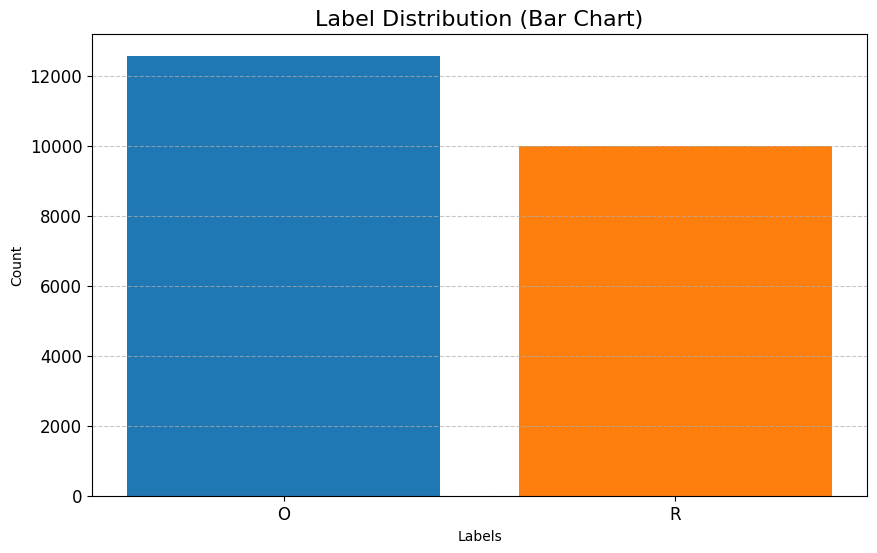

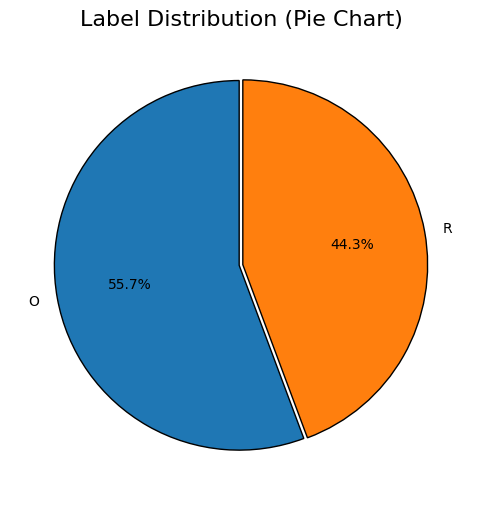

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
import os
warnings.filterwarnings('ignore')

test_path = "dataset/TEST"
train_path = "dataset/TRAIN"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


x_data = []
y_data = []


for category in glob(train_path + '/*'):
    print(f"Processing category: {category}")
    for file in tqdm(glob(category + '/*.jpg')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))


if len(x_data) == 0 or len(y_data) == 0:
    print("No images or labels found. Please check your file paths.")
else:
    print(f"Number of images: {len(x_data)}, Number of labels: {len(y_data)}")


data = pd.DataFrame({'image': x_data, 'label': y_data})
print(f"DataFrame shape: {data.shape}")


label_counts = data.label.value_counts()

#  Bar Chart
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 
plt.bar(label_counts.index, label_counts.values, color=colors[:len(label_counts)])
plt.title('Label Distribution (Bar Chart)', fontsize=16)
plt.xlabel('Labels', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#  Pie Chart
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom color palette for pie chart
plt.pie(label_counts, labels=label_counts.index, colors=colors[:len(label_counts)], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1},explode=[0.01,0.01] )
plt.title('Label Distribution (Pie Chart)', fontsize=16)
plt.show()
